#Lab-6

Build Support Vector Machine model for a given dataset

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving letter-recognition.csv to letter-recognition.csv


Build a SVM classifier to classify IRIS flower dataset using the kernels RBF and linear.

Use 80% of data for training and 20% for testing.

Display accuracy score and confusion matrix of the trained model on test data.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load Iris dataset
iris = pd.read_csv("iris.csv")

# Encode labels
le = LabelEncoder()
iris['species'] = le.fit_transform(iris['species'])

# Split data
X = iris.drop('species', axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Kernel SVM
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)
y_pred_linear = svc_linear.predict(X_test)

print("Linear Kernel:")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))

# RBF Kernel SVM
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)
y_pred_rbf = svc_rbf.predict(X_test)

print("\nRBF Kernel:")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))


Linear Kernel:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

RBF Kernel:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Build a SVM classifier to classify Letter-recognition data set

Use 80% of data for training and 20% for testing.

Display accuracy score and confusion matrix of the trained model on test data. Plot the ROC curve
and display AUC score.

Accuracy: 0.36825
Confusion Matrix:
 [[149   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [149   0   0   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 68   0  69   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 88   0   0  68   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [124   0  17   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [106   0   0   1   0  31   0   0   0   0   0   0   0   0   0   1   0   0
    0   1   0   0   0   0   0   0]
 [157   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   0   0   0   0   0]
 [140   0   0   2   0   0   0   0   0   0   0   0   0   0   0   1   0   0
    0   0   1   0   0   0   0   0]
 [ 48   0   0   0   0   0   0   0  95   0   0   0   0   0   0   1   0   0
    0   0   0   0

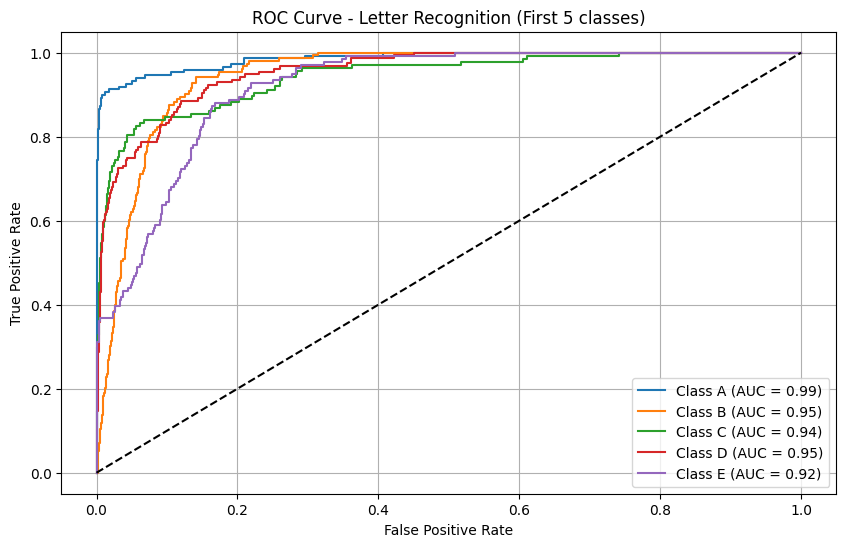

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

# Load Letter-recognition dataset
letter = pd.read_csv("letter-recognition.csv")

# Assume first column is the label, rest are features
X = letter.iloc[:, 1:]
y = letter.iloc[:, 0]

# Binarize labels for ROC
lb = LabelBinarizer()
y_bin = lb.fit_transform(y)

# Train-Test Split
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# One-vs-Rest SVM with linear kernel
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True))
classifier.fit(X_train, y_train_bin)
y_score = classifier.decision_function(X_test)

# Accuracy and Confusion Matrix (for multiclass)
y_pred_class = classifier.predict(X_test)
y_pred_labels = lb.inverse_transform(y_pred_class)
y_true_labels = lb.inverse_transform(y_test_bin)

print("Accuracy:", accuracy_score(y_true_labels, y_pred_labels))
print("Confusion Matrix:\n", confusion_matrix(y_true_labels, y_pred_labels))

# Compute ROC and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curve for a few classes (for clarity)
plt.figure(figsize=(10, 6))
for i in range(min(5, len(lb.classes_))):  # Plot first 5 classes
    plt.plot(fpr[i], tpr[i], label=f'Class {lb.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Letter Recognition (First 5 classes)')
plt.legend()
plt.grid()
plt.show()